In [672]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


from sklearn.preprocessing import MultiLabelBinarizer

%matplotlib inline 

In [706]:
df = pd.read_csv('./hearthstone_collectible_df.csv')
df.head().T

,0,1,2,3,4
artist,NaN,NaN,NaN,NaN,NaN
attack,NaN,NaN,NaN,NaN,NaN
cardId,HERO_09,HERO_01,HERO_07,HERO_08,HERO_06
cardSet,Basic,Basic,Basic,Basic,Basic
collectible,True,True,True,True,True
cost,NaN,NaN,NaN,NaN,NaN
dbfId,813,7,893,637,274
durability,NaN,NaN,NaN,NaN,NaN
faction,Neutral,Neutral,Neutral,Neutral,Neutral
flavor,NaN,NaN,NaN,NaN,NaN


In [707]:
df.shape

(2012, 27)

## Cleaning

Things to clean up:
 - the elite column seems to be true if the card is a legendary, empty otherwise. Check this, and if so, it's extraneous information, so we can just drop the elite column.
 - Not every card has a race, so we can change NaNs to 'general', as is documented here:
  https://hearthstone.gamepedia.com/Minion
 - Change NaN  in 'text' to empty string (if the card has no text)
 - Faction is either 'Horde', 'Alliance', or 'Neutral' - change all NaNs to neutral.

In [708]:
df[(df['elite'].isna()) & (df['rarity'] == 'Legendary')]

,artist,attack,cardId,cardSet,collectible,cost,dbfId,durability,faction,flavor,...,name,playerClass,race,rarity,text,type,elite,classes,multiClassGroup,armor


In [709]:
# they're all the same - we can drop the elite column!

df.drop(columns = ['elite'], inplace = True)

Now let's change the NaNs to general in the race column:

In [710]:
df['race'].value_counts()

Beast        161
Mech         104
Elemental     77
Demon         47
Dragon        44
Murloc        33
Pirate        27
Totem          6
All            1
Name: race, dtype: int64

In [711]:
df['race'] = df['race'].fillna('General')

In [712]:
df['race'].value_counts().sum()

2012

And now the empty strings in text:

In [713]:
df['text'] = df['text'].fillna(' ')

In [714]:
df.text.isnull().sum()

0

Finally the empty strings in faction:

In [715]:
df['faction'] = df['faction'].fillna('Neutral')

In [716]:
df.faction.value_counts()

Neutral     1935
Alliance      51
Horde         26
Name: faction, dtype: int64

And we can drop the redundant 'collectible' column:

In [717]:
df.drop(columns = ['collectible'], inplace = True)

In [718]:
df.shape

(2012, 25)

In [719]:
df[df['durability'].notna()].T

,29,73,110,113,114,225,239,264,273,317,...,1831,1834,1851,1904,1908,1925,1942,1958,1959,1981
artist,Glenn Rane,Lucas Graciano,Ryan Sook,Stefan Kopinski,Brian Huang,Nate Bowden,Cyril Van Der Haegen,Daren Bader,Efrem Palacios,John Polidora,...,J. Axer,M. Alvares & M. Azevedo,Jason Kang,Vladimir Kafanov,Vlad Botos,Jakub Kasper,Jim Nelson,Jason Kang,Akkapoj T.,L. Lullabi & K. Turovec
attack,1,3,4,5,3,2,3,2,1,2,...,0,3,4,0,2,0,2,4,3,0
cardId,CS2_091,CS2_106,CS2_097,CS2_112,CS2_080,EX1_247,EX1_536,EX1_133,EX1_366,EX1_567,...,TRL_317,TRL_304,TRL_325,DAL_568,DAL_571,DAL_177,DAL_563,DAL_720,DAL_063,DAL_378
cardSet,Basic,Basic,Basic,Basic,Basic,Classic,Classic,Classic,Classic,Classic,...,Rastakhan's Rumble,Rastakhan's Rumble,Rastakhan's Rumble,Rise of Shadows,Rise of Shadows,Rise of Shadows,Rise of Shadows,Rise of Shadows,Rise of Shadows,Rise of Shadows
cost,1,3,4,5,5,2,3,3,3,5,...,5,5,6,2,2,3,4,4,4,6
dbfId,383,401,847,304,421,960,1662,391,643,352,...,50086,50014,50056,52490,52496,51971,52482,52617,51738,52089
durability,4,2,2,2,4,3,2,2,5,8,...,0,3,4,0,2,0,0,2,2,0
faction,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,...,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral
flavor,Prince Malchezaar was a collector of rare weap...,"During times of tranquility and harmony, this ...","It Slices, it Dices. You can cut a tin can wit...",No… actually you should fear the Reaper.,Guaranteed to have been owned by a real assass...,"Yo, that's a nice axe.",First Lesson: Put the pointy end in the other ...,Perdition's Blade is Ragnaros's back-up weapon...,I dub you Sir Loin of Beef!,Orgrim Doomhammer gave this legendary weapon t...,...,"If you’re burning and you know it, wave your h...",Only two things in life are certain: death and...,"“Griftah here with de Sul’chop. One chop, you ...",Some might call this a lightforgery.,It knows every secret you have left.,If only you’d let it go to voicemail…,"Eager to please, even if it kills him.",Kobolds informally refer to its effect as a de...,Whoso pulleth out this wrench from the toolbox...,The Kirin Tor have always been lax in enforcin...
health,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,0,0,NaN,2,NaN,NaN,NaN


In [720]:
df.columns

Index(['artist', 'attack', 'cardId', 'cardSet', 'cost', 'dbfId', 'durability',
       'faction', 'flavor', 'health', 'howToGet', 'howToGetGold', 'img',
       'imgGold', 'locale', 'mechanics', 'name', 'playerClass', 'race',
       'rarity', 'text', 'type', 'classes', 'multiClassGroup', 'armor'],
      dtype='object')

In [721]:
df['cardSet'].value_counts()

Classic                         237
Basic                           142
Journey to Un'Goro              135
Knights of the Frozen Throne    135
The Boomsday Project            135
Rastakhan's Rumble              135
Kobolds & Catacombs             135
Rise of Shadows                 135
Whispers of the Old Gods        134
The Grand Tournament            132
Mean Streets of Gadgetzan       132
The Witchwood                   129
Goblins vs Gnomes               123
The League of Explorers          45
One Night in Karazhan            45
Blackrock Mountain               31
Naxxramas                        30
Hall of Fame                     22
Name: cardSet, dtype: int64

In [722]:
value_count_list = ['attack',  'cardSet', 'cost', 
       'durability', 'faction',  'health', 
       'playerClass', 'race',
       'rarity',  'type',  'classes', 'armor']

for column in value_count_list:
    print(f'The {column} values are: ')
    print(df[column].value_counts())
    print('')
    

The attack values are: 
2.0     335
3.0     308
4.0     208
1.0     195
5.0     167
6.0      73
0.0      69
7.0      52
8.0      33
9.0      14
10.0      4
12.0      3
20.0      1
Name: attack, dtype: int64

The cardSet values are: 
Classic                         237
Basic                           142
Journey to Un'Goro              135
Knights of the Frozen Throne    135
The Boomsday Project            135
Rastakhan's Rumble              135
Kobolds & Catacombs             135
Rise of Shadows                 135
Whispers of the Old Gods        134
The Grand Tournament            132
Mean Streets of Gadgetzan       132
The Witchwood                   129
Goblins vs Gnomes               123
The League of Explorers          45
One Night in Karazhan            45
Blackrock Mountain               31
Naxxramas                        30
Hall of Fame                     22
Name: cardSet, dtype: int64

The cost values are: 
3.0     365
2.0     361
4.0     316
5.0     248
1.0     239
6.0     

In [723]:
df.head(9)

,artist,attack,cardId,cardSet,cost,dbfId,durability,faction,flavor,health,...,mechanics,name,playerClass,race,rarity,text,type,classes,multiClassGroup,armor
0,NaN,NaN,HERO_09,Basic,NaN,813,NaN,Neutral,NaN,30.0,...,NaN,Anduin Wrynn,Priest,General,Free,,Hero,NaN,NaN,NaN
1,NaN,NaN,HERO_01,Basic,NaN,7,NaN,Neutral,NaN,30.0,...,NaN,Garrosh Hellscream,Warrior,General,Free,,Hero,NaN,NaN,NaN
2,NaN,NaN,HERO_07,Basic,NaN,893,NaN,Neutral,NaN,30.0,...,NaN,Gul'dan,Warlock,General,Free,,Hero,NaN,NaN,NaN
3,NaN,NaN,HERO_08,Basic,NaN,637,NaN,Neutral,NaN,30.0,...,NaN,Jaina Proudmoore,Mage,General,Free,,Hero,NaN,NaN,NaN
4,NaN,NaN,HERO_06,Basic,NaN,274,NaN,Neutral,NaN,30.0,...,NaN,Malfurion Stormrage,Druid,General,Free,,Hero,NaN,NaN,NaN
5,NaN,NaN,HERO_05,Basic,NaN,31,NaN,Neutral,NaN,30.0,...,NaN,Rexxar,Hunter,General,Free,,Hero,NaN,NaN,NaN
6,NaN,NaN,HERO_02,Basic,NaN,1066,NaN,Neutral,NaN,30.0,...,NaN,Thrall,Shaman,General,Free,,Hero,NaN,NaN,NaN
7,NaN,NaN,HERO_04,Basic,NaN,671,NaN,Neutral,NaN,30.0,...,NaN,Uther Lightbringer,Paladin,General,Free,,Hero,NaN,NaN,NaN
8,NaN,NaN,HERO_03,Basic,NaN,930,NaN,Neutral,NaN,30.0,...,NaN,Valeera Sanguinar,Rogue,General,Free,,Hero,NaN,NaN,NaN


Okay - we drop the first nine rows, because these aren't actually playable cards - these are just your heros.


In [724]:
df.drop([0,1,2,3,4,5,6,7,8], inplace = True)

In [725]:
df.head()

,artist,attack,cardId,cardSet,cost,dbfId,durability,faction,flavor,health,...,mechanics,name,playerClass,race,rarity,text,type,classes,multiClassGroup,armor
9,Dan Scott,NaN,CS2_041,Basic,0.0,149,NaN,Neutral,I personally prefer some non-ancestral right-t...,NaN,...,[{'name': 'Taunt'}],Ancestral Healing,Shaman,General,Free,Restore a minion\nto full Health and\ngive it ...,Spell,NaN,NaN,NaN
10,Michael Sutfin,NaN,CS2_072,Basic,0.0,180,NaN,Neutral,"It's funny how often yelling ""Look over there!...",NaN,...,NaN,Backstab,Rogue,General,Free,Deal $2 damage to an undamaged minion.,Spell,NaN,NaN,NaN
11,Doug Alexander,NaN,EX1_169,Basic,0.0,254,NaN,Neutral,Some druids still have flashbacks from strange...,NaN,...,NaN,Innervate,Druid,General,Free,Gain 1 Mana Crystal this turn only.,Spell,NaN,NaN,NaN
12,Richard Wright,NaN,CS2_008,Basic,0.0,467,NaN,Neutral,"""Cast Moonfire, and never stop."" - How to Be a...",NaN,...,NaN,Moonfire,Druid,General,Free,Deal $1 damage.,Spell,NaN,NaN,NaN
13,Jim Nelson,NaN,NEW1_003,Basic,0.0,163,NaN,Neutral,This is the reason that Demons never really be...,NaN,...,NaN,Sacrificial Pact,Warlock,General,Free,Destroy a Demon. Restore #5 Health to your hero.,Spell,NaN,NaN,NaN


In [726]:
df['locale'].value_counts()

enUS    2003
Name: locale, dtype: int64

In [727]:
df['multiClassGroup'].value_counts()

Kabal          3
Jade Lotus     3
Grimy Goons    3
Name: multiClassGroup, dtype: int64

In [728]:
# columns to drop for analysis purposes:

df.drop(columns = ['artist', 'flavor', 'howToGet', 'howToGetGold', "dbfId", 
                   'img', 'imgGold', 'locale', 'classes','multiClassGroup'], inplace = True)


In [729]:
df.head()

,attack,cardId,cardSet,cost,durability,faction,health,mechanics,name,playerClass,race,rarity,text,type,armor
9,NaN,CS2_041,Basic,0.0,NaN,Neutral,NaN,[{'name': 'Taunt'}],Ancestral Healing,Shaman,General,Free,Restore a minion\nto full Health and\ngive it ...,Spell,NaN
10,NaN,CS2_072,Basic,0.0,NaN,Neutral,NaN,NaN,Backstab,Rogue,General,Free,Deal $2 damage to an undamaged minion.,Spell,NaN
11,NaN,EX1_169,Basic,0.0,NaN,Neutral,NaN,NaN,Innervate,Druid,General,Free,Gain 1 Mana Crystal this turn only.,Spell,NaN
12,NaN,CS2_008,Basic,0.0,NaN,Neutral,NaN,NaN,Moonfire,Druid,General,Free,Deal $1 damage.,Spell,NaN
13,NaN,NEW1_003,Basic,0.0,NaN,Neutral,NaN,NaN,Sacrificial Pact,Warlock,General,Free,Destroy a Demon. Restore #5 Health to your hero.,Spell,NaN


## Get dummies for:
  - cardSet
  - faction
  - mechanics (fix this)
  - playerClass
  - race
  - rarity (but we can make this 0-4, since indeed legendary is more rare than common)
  - type
  
Also maybe replace the NaNs with -1? This could solve our NaN problem. 

In [730]:
#reset the index
df.reset_index(inplace = True)
df.drop(columns = ['index'], inplace = True)
df.head()

,attack,cardId,cardSet,cost,durability,faction,health,mechanics,name,playerClass,race,rarity,text,type,armor
0,NaN,CS2_041,Basic,0.0,NaN,Neutral,NaN,[{'name': 'Taunt'}],Ancestral Healing,Shaman,General,Free,Restore a minion\nto full Health and\ngive it ...,Spell,NaN
1,NaN,CS2_072,Basic,0.0,NaN,Neutral,NaN,NaN,Backstab,Rogue,General,Free,Deal $2 damage to an undamaged minion.,Spell,NaN
2,NaN,EX1_169,Basic,0.0,NaN,Neutral,NaN,NaN,Innervate,Druid,General,Free,Gain 1 Mana Crystal this turn only.,Spell,NaN
3,NaN,CS2_008,Basic,0.0,NaN,Neutral,NaN,NaN,Moonfire,Druid,General,Free,Deal $1 damage.,Spell,NaN
4,NaN,NEW1_003,Basic,0.0,NaN,Neutral,NaN,NaN,Sacrificial Pact,Warlock,General,Free,Destroy a Demon. Restore #5 Health to your hero.,Spell,NaN


In [731]:
df['mechanics'].value_counts()

[{'name': 'Battlecry'}]                                                                                          392
[{'name': 'Deathrattle'}]                                                                                        158
[{'name': 'Taunt'}]                                                                                               70
[{'name': 'Secret'}]                                                                                              42
[{'name': 'Battlecry'}, {'name': 'Taunt'}]                                                                        29
[{'name': 'Aura'}]                                                                                                27
[{'name': 'Stealth'}]                                                                                             27
[{'name': 'Spell Damage'}]                                                                                        22
[{'name': 'Combo'}]                                             

We have strings of lists of dictionaries, and we need the values.... YIKES!
Thanks to Ritchie, we have this package that should help:

In [732]:
import ast

In [733]:
# testing it out:
ast.literal_eval(df['mechanics'][0])[0]['name']

#YES!

'Taunt'

In [734]:
# help from here, because this WAS THE WORST. 
# https://stackoverflow.com/questions/52232742/how-to-use-ast-literal-eval-in-a-pandas-dataframe-and-handle-exceptions

def literal_return(val):
    try:
        return ast.literal_eval(val)
    except (ValueError, SyntaxError) as e:
        return val

In [735]:
df['mechanics'] = df['mechanics'].apply(literal_return)

In [736]:
df[df['name']=='Zilliax']

,attack,cardId,cardSet,cost,durability,faction,health,mechanics,name,playerClass,race,rarity,text,type,armor
1702,3.0,BOT_548,The Boomsday Project,5.0,NaN,Neutral,2.0,"[{'name': 'Magnetic'}, {'name': 'Divine Shield...",Zilliax,Neutral,Mech,Legendary,"<b>Magnetic</b>\n<b><b>Divine Shield</b>, <b>T...",Minion,NaN


In [737]:
def get_mechanics(row):
    try:
        return [list(attr.values())[0] for attr in row]
    except:
        return np.nan

df_mechanics_list = df['mechanics'].apply(get_mechanics)

In [738]:
df_mechanics_list = pd.DataFrame(df_mechanics_list)

In [739]:
df_mechanics_list['mechanics'][1984]

['Battlecry', 'Discover']

In [740]:
# https://stackoverflow.com/questions/29034928/pandas-convert-a-column-of-list-to-dummies

df_mech_all = pd.get_dummies(df_mechanics_list['mechanics'].apply(pd.Series).stack()).sum(level=0).add_prefix('mech_')

In [741]:
df_mech_all.head()

,mech_Adapt,mech_AdjacentBuff,mech_AffectedBySpellPower,mech_Aura,mech_Battlecry,mech_Charge,mech_Combo,mech_Deathrattle,mech_Discover,mech_Divine Shield,...,mech_Quest,mech_Recruit,mech_Rush,mech_Secret,mech_Silence,mech_Spell Damage,mech_Stealth,mech_Taunt,mech_Twinspell,mech_Windfury
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [742]:
df = df.join(df_mech_all, how = 'outer')

In [743]:
df.head()

,attack,cardId,cardSet,cost,durability,faction,health,mechanics,name,playerClass,...,mech_Quest,mech_Recruit,mech_Rush,mech_Secret,mech_Silence,mech_Spell Damage,mech_Stealth,mech_Taunt,mech_Twinspell,mech_Windfury
0,NaN,CS2_041,Basic,0.0,NaN,Neutral,NaN,[{'name': 'Taunt'}],Ancestral Healing,Shaman,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,NaN,CS2_072,Basic,0.0,NaN,Neutral,NaN,NaN,Backstab,Rogue,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,EX1_169,Basic,0.0,NaN,Neutral,NaN,NaN,Innervate,Druid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,CS2_008,Basic,0.0,NaN,Neutral,NaN,NaN,Moonfire,Druid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NEW1_003,Basic,0.0,NaN,Neutral,NaN,NaN,Sacrificial Pact,Warlock,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [744]:
df = pd.concat([df, pd.get_dummies(df['cardSet'], prefix='cardset')],axis=1)
df = pd.concat([df, pd.get_dummies(df['faction'], prefix='faction')],axis=1)
df = pd.concat([df, pd.get_dummies(df['playerClass'], prefix='playerclass')],axis=1)
df = pd.concat([df, pd.get_dummies(df['race'], prefix='race')],axis=1)
df = pd.concat([df, pd.get_dummies(df['type'], prefix='type')],axis=1)


In [745]:
df.head().T

,0,1,2,3,4
attack,NaN,NaN,NaN,NaN,NaN
cardId,CS2_041,CS2_072,EX1_169,CS2_008,NEW1_003
cardSet,Basic,Basic,Basic,Basic,Basic
cost,0,0,0,0,0
durability,NaN,NaN,NaN,NaN,NaN
faction,Neutral,Neutral,Neutral,Neutral,Neutral
health,NaN,NaN,NaN,NaN,NaN
mechanics,[{'name': 'Taunt'}],NaN,NaN,NaN,NaN
name,Ancestral Healing,Backstab,Innervate,Moonfire,Sacrificial Pact
playerClass,Shaman,Rogue,Druid,Druid,Warlock


We are finally almost done - now we replace all NaNs in the attack, durability, health, and armor with -1:

In [746]:
df['attack'] = df['attack'].fillna(-1)
df['durability'] = df['durability'].fillna(-1)
df['health'] = df['health'].fillna(-1)
df['armor'] = df['armor'].fillna(-1)


Map the rarities to values 0-4:

In [747]:
df['rarity'].value_counts()

Common       713
Rare         519
Epic         339
Legendary    299
Free         133
Name: rarity, dtype: int64

In [748]:
df['rarity_value'] = df['rarity'].map({'Free':0, 
                  'Common':1,
                 'Rare':2,
                 'Epic':3,
                 'Legendary':4})

In [663]:
# drop mechanics columns

df.drop(columns=['mechanics'], inplace = True)

Check we've gotten rid of every NaN except the ones in the mech_ columns, then replace all those NaNs with 0.

In [664]:
df = df.fillna(0)

In [665]:
df.isna().sum().sum()

0

FINALLLYYYYY we can save this to a dataframe!!!

In [666]:
df.head()

,attack,cardId,cardSet,cost,durability,faction,health,name,playerClass,race,...,race_General,race_Mech,race_Murloc,race_Pirate,race_Totem,type_Hero,type_Minion,type_Spell,type_Weapon,rarity_value
0,-1.0,CS2_041,Basic,0.0,-1.0,Neutral,-1.0,Ancestral Healing,Shaman,General,...,1,0,0,0,0,0,0,1,0,0
1,-1.0,CS2_072,Basic,0.0,-1.0,Neutral,-1.0,Backstab,Rogue,General,...,1,0,0,0,0,0,0,1,0,0
2,-1.0,EX1_169,Basic,0.0,-1.0,Neutral,-1.0,Innervate,Druid,General,...,1,0,0,0,0,0,0,1,0,0
3,-1.0,CS2_008,Basic,0.0,-1.0,Neutral,-1.0,Moonfire,Druid,General,...,1,0,0,0,0,0,0,1,0,0
4,-1.0,NEW1_003,Basic,0.0,-1.0,Neutral,-1.0,Sacrificial Pact,Warlock,General,...,1,0,0,0,0,0,0,1,0,0


In [667]:
df.to_csv('dummies_df_card_list.csv', index = False)

# Some visualizations of subsets of this Data

In [668]:
df.columns

Index(['attack', 'cardId', 'cardSet', 'cost', 'durability', 'faction',
       'health', 'name', 'playerClass', 'race', 'rarity', 'text', 'type',
       'armor', 'mech_Adapt', 'mech_AdjacentBuff', 'mech_AffectedBySpellPower',
       'mech_Aura', 'mech_Battlecry', 'mech_Charge', 'mech_Combo',
       'mech_Deathrattle', 'mech_Discover', 'mech_Divine Shield', 'mech_Echo',
       'mech_Freeze', 'mech_ImmuneToSpellpower', 'mech_Inspire',
       'mech_InvisibleDeathrattle', 'mech_Jade Golem', 'mech_Lifesteal',
       'mech_Magnetic', 'mech_Overkill', 'mech_Overload', 'mech_Poisonous',
       'mech_Quest', 'mech_Recruit', 'mech_Rush', 'mech_Secret',
       'mech_Silence', 'mech_Spell Damage', 'mech_Stealth', 'mech_Taunt',
       'mech_Twinspell', 'mech_Windfury', 'cardset_Basic',
       'cardset_Blackrock Mountain', 'cardset_Classic',
       'cardset_Goblins vs Gnomes', 'cardset_Hall of Fame',
       'cardset_Journey to Un'Goro', 'cardset_Knights of the Frozen Throne',
       'cardset_Kobolds 

Text(0.5,0,'Player Class')

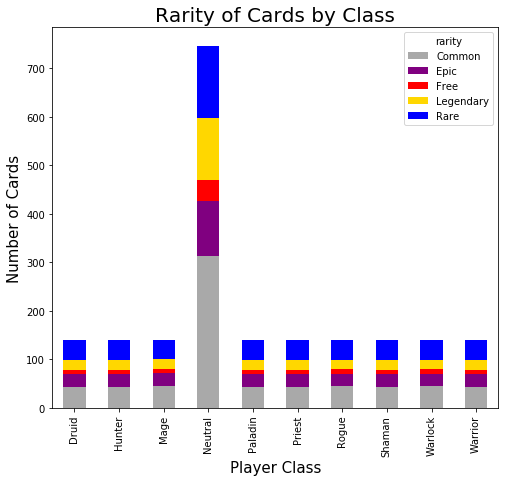

In [698]:
# https://stackoverflow.com/questions/55151699/plotting-categorical-variable-as-stacked-bar-plot
# https://matplotlib.org/examples/color/named_colors.html

pd.crosstab(df['playerClass'], df['rarity']).plot(kind='bar', 
                                                  stacked=True,
                                                 figsize = (8,7),
                                                 color=['darkgray', 'purple', 'r', 'gold', 'b'])

plt.title('Rarity of Cards by Class', fontsize = 20)
plt.ylabel('Number of Cards', fontsize = 15)
plt.xlabel('Player Class', fontsize = 15)



Text(0.5,0,'Card Cost')

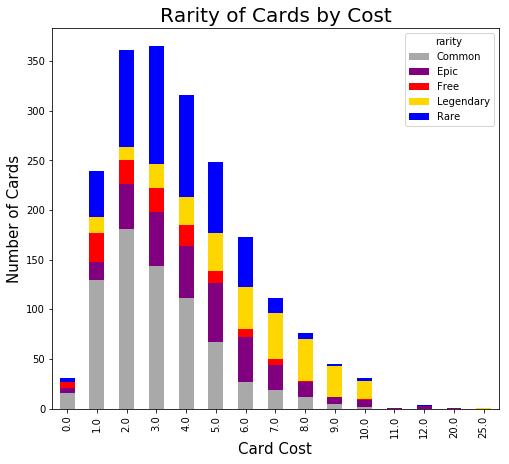

In [705]:
pd.crosstab(df['cost'], df['rarity']).plot(kind='bar', 
                                                  stacked=True,
                                                 figsize = (8,7),
                                                 color=['darkgray', 'purple', 'r', 'gold', 'b'])

plt.title('Rarity of Cards by Cost', fontsize = 20)
plt.ylabel('Number of Cards', fontsize = 15)
plt.xlabel('Card Cost', fontsize = 15)


Text(0.5,0,'Player Class')

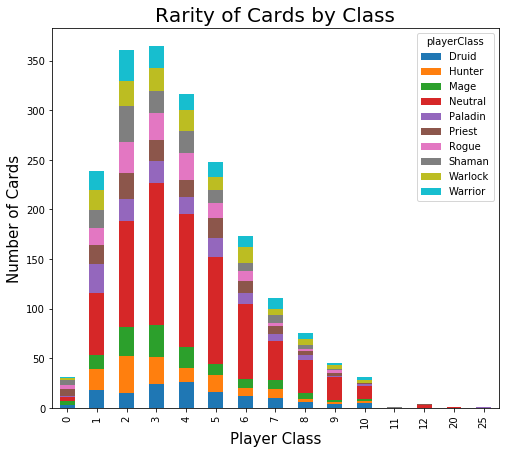

In [702]:
# cost of cards by class

pd.crosstab(df['cost'].astype(int),df['playerClass'] ).plot(kind='bar', 
                                                  stacked=True,
                                                 figsize = (8,7))
                                                 #color=['darkgray', 'purple', 'r', 'gold', 'b'])

plt.title('Rarity of Cards by Class', fontsize = 20)
plt.ylabel('Number of Cards', fontsize = 15)
plt.xlabel('Player Class', fontsize = 15)



Text(0.5,0,'Card Cost')

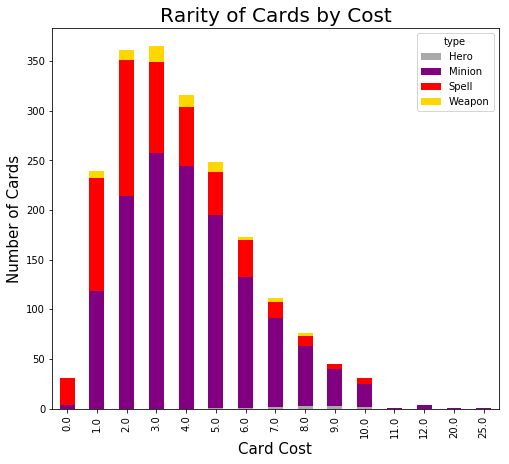

In [749]:
pd.crosstab(df['cost'], df['type']).plot(kind='bar', 
                                                  stacked=True,
                                                 figsize = (8,7),
                                                 color=['darkgray', 'purple', 'r', 'gold', 'b'])

plt.title('Rarity of Cards by Cost', fontsize = 20)
plt.ylabel('Number of Cards', fontsize = 15)
plt.xlabel('Card Cost', fontsize = 15)